In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
plt.rcParams.update(plt.rcParamsDefault)

<h1>EDA: Data loading & investigation</h1>

In [2]:
df = pd.read_csv("tennis_stats.csv")
df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [3]:
df.corr(numeric_only=True)

,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
Year,1.000000,0.051406,-0.016728,-0.106784,0.005300,-0.039087,-0.108367,-0.072404,-0.101735,-0.114806,...,-0.073256,-0.078229,-0.108477,-0.008930,-0.041790,-0.005544,-0.108235,-0.077181,0.043908,-0.040483
FirstServe,0.051406,1.000000,-0.070659,0.025488,0.101417,-0.001924,0.048149,-0.018877,0.057709,0.062345,...,-0.010676,0.004189,0.071920,0.137473,0.148349,0.180996,0.064832,0.053736,0.057882,-0.068759
FirstServePointsWon,-0.016728,-0.070659,1.000000,0.021729,0.320765,-0.004724,0.460323,-0.041538,0.301925,0.324853,...,-0.010193,-0.002793,0.376460,0.817829,0.648753,0.860033,0.356702,0.330581,0.361121,-0.150004
FirstServeReturnPointsWon,-0.106784,0.025488,0.021729,1.000000,0.072707,0.301265,0.140165,0.324057,0.295724,0.313338,...,0.757435,0.834267,0.261206,0.091319,0.496682,0.052335,0.256029,0.243278,0.240808,-0.178664
SecondServePointsWon,0.005300,0.101417,0.320765,0.072707,1.000000,0.103584,0.266269,0.052755,0.258691,0.277782,...,0.096622,0.095585,0.296809,0.650764,0.622673,0.713076,0.268979,0.250918,0.281215,-0.181013
SecondServeReturnPointsWon,-0.039087,-0.001924,-0.004724,0.301265,0.103584,1.000000,0.095494,0.264413,0.234212,0.249583,...,0.603755,0.727338,0.209521,0.096553,0.408975,0.055004,0.193093,0.185217,0.199401,-0.159592
Aces,-0.108367,0.048149,0.460323,0.140165,0.266269,0.095494,1.000000,0.037188,0.757405,0.784934,...,0.139987,0.138023,0.866138,0.440922,0.428679,0.472101,0.825301,0.768628,0.798404,-0.277811
BreakPointsConverted,-0.072404,-0.018877,-0.041538,0.324057,0.052755,0.264413,0.037188,1.000000,0.096368,0.086502,...,0.561759,0.387170,0.083182,-0.025670,0.255050,-0.007254,0.076989,0.062297,0.075022,-0.051005
BreakPointsFaced,-0.101735,0.057709,0.301925,0.295724,0.258691,0.234212,0.757405,0.096368,1.000000,0.973352,...,0.335205,0.331043,0.971296,0.354012,0.463110,0.354005,0.883470,0.943309,0.876036,-0.322082
BreakPointsOpportunities,-0.114806,0.062345,0.324853,0.313338,0.277782,0.249583,0.784934,0.086502,0.973352,1.000000,...,0.358483,0.352783,0.978278,0.372271,0.491198,0.380716,0.923453,0.909295,0.900444,-0.334548


***<h6>Correlation matrix shows multiple strong relationships. For example, "Wins" is strongly correlated with "BreakPointsOpportunities", "BreakPointsFaced" and "Aces". </h6>***

<h1>Constructing Single-Feature Linear Regression Models: Predicting Wins</h1>
<h2>Model 1</h2>
For my first Single-Feature Model, I have chosen "BreakPointsOpportunities" as my feature and "Wins" as my outcome, beacause they show the strongest correlation.

In [4]:
#Creating Features & outcome (X & y)
X = df[["BreakPointsOpportunities"]] #Double-square brackets create a DataFrame
y = df[["Wins"]]

In [5]:
#Training, Testing & Evaluating model
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=42) #Splitting data into training and testing set.
model1 = LinearRegression() #Creating a model
model1.fit(X_train, y_train) #Fitting training data to the model
print(model1.score(X_test, y_test)) #Testing data for validation

0.8295318580883618


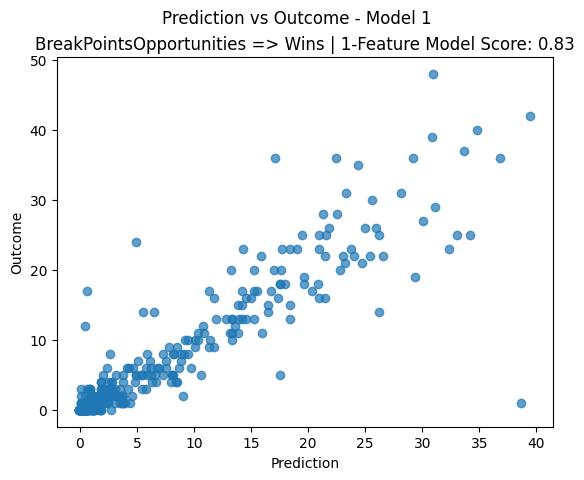

In [6]:
#Predicting & Plotting final results
prediction = model1.predict(X_test)
plt.scatter(prediction, y_test, alpha=0.7)
plt.suptitle("Prediction vs Outcome - Model 1")
plt.title(f"BreakPointsOpportunities => Wins | 1-Feature Model Score: {np.round(model1.score(X_test, y_test), 2)}")
plt.xlabel("Prediction")
plt.ylabel("Outcome")
plt.show()

<h2>Model 2</h2>
Feature: BreakPointsFaced<br>
Outcome: Wins

In [22]:
#Data loading
feature = df[["BreakPointsFaced"]]
outcome = df[["Wins"]]

In [23]:
#Partitioning for testing and training
X_train, X_test, y_train, y_test = train_test_split(feature, outcome, train_size = 0.8, random_state=42)

In [24]:
#Model creation, fitting data, printing score
model2 = LinearRegression()
model2.fit(X_train, y_train)
print(model2.score(X_test, y_test))

0.75242807028613


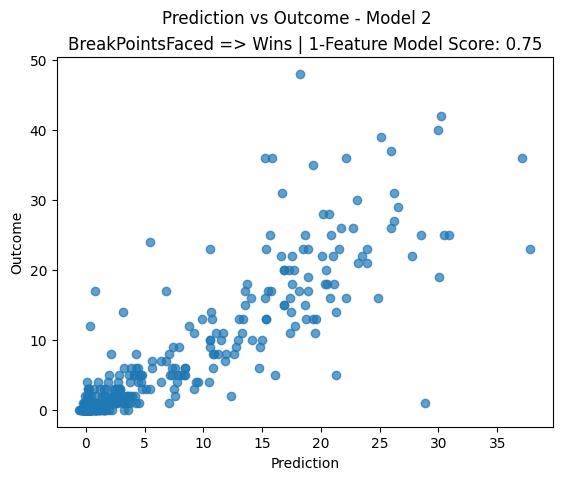

In [25]:
#Predicting & Plotting final results
prediction_2 = model2.predict(X_test)
plt.scatter(prediction_2, y_test, alpha=0.7)
plt.suptitle("Prediction vs Outcome - Model 2")
plt.title(f"BreakPointsFaced => Wins | 1-Feature Model Score: {np.round(model2.score(X_test, y_test), 2)}")
plt.xlabel("Prediction")
plt.ylabel("Outcome")
plt.show()

**CONCLUSION:** The best single-feature model for predicting Wins is Model 1. BreakPointsOpportunities correlates with Wins the most, hence the high R^2 score. <br>

<h1>Two-Feature Models: Yearly Earnings</h1>

<h2>Model 3</h2>
I decided to combine the 2 features (BreakPointsOpportunities & BreakPointsFaced) to create a new model that predicts Winnings (Yearly Earnings).
<br>

**Features:** BreakPointsOpportunities, BreakPointsFaced<br>
**Outcome:** Wins

In [26]:
#Data Loading
features = df[["BreakPointsOpportunities", "BreakPointsFaced"]]
outcome = df[["Winnings"]]

In [27]:
#Partitioning for testing & learning
X_train, X_test, y_train, y_test = train_test_split(features, outcome, train_size = 0.8, random_state=42)
model3 = LinearRegression()
model3.fit(X_train, y_train)
print(model3.score(X_test, y_test))

0.7865190031125882


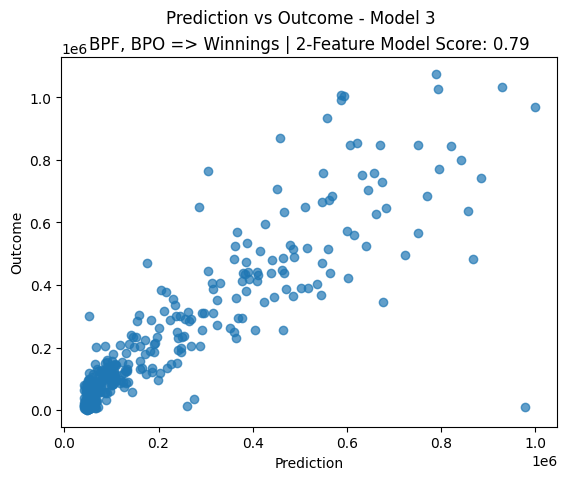

In [28]:
#Predicting & Plotting final results
prediction_3 = model3.predict(X_test)
plt.scatter(prediction_3, y_test, alpha=0.7)
plt.suptitle("Prediction vs Outcome - Model 3")
plt.title(f"BPF, BPO => Winnings | 2-Feature Model Score: {np.round(model3.score(X_test, y_test), 2)}")
plt.xlabel("Prediction")
plt.ylabel("Outcome")
plt.show()

**CONCLUSION:** The 2-feature model scored an R^2 score of 0.79, which I consider a great performance.

In [14]:
#2-feature model (Model 3) predicting
dict1 = {"BreakPointsOpportunities": [41], "BreakPointsFaced": [55]}
dict1 = pd.DataFrame(dict1)
print(f"Winnings: {model3.predict(dict1)}")

Winnings: [[117676.53705685]]


<h1>Multiple Linear Regression: Predicting Yearly Earnings (Winnings)<h1>

<h2>Model 4</h2>
I decided to combine 3 features (BreakPointsOpportunities, BreakPointsFaced & Aces) to create a new model that predicts Winnings (Yearly Earnings).
<br>

**Features:** BreakPointsOpportunities, BreakPointsFaced, Aces<br>
**Outcome:** Wins

In [29]:
#Data loading
features = df[["BreakPointsOpportunities", "BreakPointsFaced", "Aces"]]
outcome = df[["Winnings"]]

In [30]:
#Data partitioning & fitting
X_train, X_test, y_train, y_test = train_test_split(features, outcome, train_size = 0.8, random_state=42)
model4 = LinearRegression()
model4.fit(X_train, y_train)
print(model4.score(X_test, y_test))

0.8288927775022585


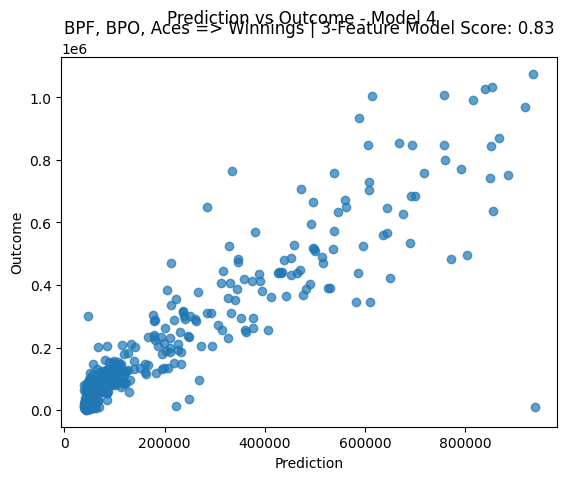

In [31]:
#Predicting & Plotting final results
prediction_4 = model4.predict(X_test)
plt.scatter(prediction_4, y_test, alpha=0.7)
plt.suptitle("Prediction vs Outcome - Model 4")
plt.title(f"BPF, BPO, Aces => Winnings | 3-Feature Model Score: {np.round(model4.score(X_test, y_test), 2)}")
plt.xlabel("Prediction")
plt.ylabel("Outcome")
plt.show()